In [1]:
import pandas as pd

DATASETS_PATH = 'data/data'

df = pd.read_csv(f'{DATASETS_PATH}/A2AR_LIGANDS.tsv', sep='\t', header=0, na_values=('NA', 'nan', 'NaN'))
df

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AACWUFIIMOHGSO_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.91968,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,AACWUFIIMOHGSO,AACWUFIIMOHGSO-UHFFFAOYSA-N,InChI=1S/C19H24N6O2/c1-12-10-13(2)25(23-12)17-...,"""AuxInfo=1/1/N:1,26,22,14,15,20,19,11,12,27,6,...",P29274_WT,...,NaN,NaN,=,8.68,8.68,0.0,0.0,1.0,8.68,0.0
1,AAEYTMMNWWKSKZ_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131451,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,AAEYTMMNWWKSKZ,AAEYTMMNWWKSKZ-UHFFFAOYSA-N,InChI=1S/C18H16N4O3S/c19-15-13-9-10-3-1-2-4-14...,"""AuxInfo=1/1/N:22,23,21,24,8,15,9,14,19,20,7,1...",P29274_WT,...,NaN,NaN,=,4.82,4.82,0.0,0.0,1.0,4.82,0.0
2,AAGFKZWKWAMJNP_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.100375,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,AAGFKZWKWAMJNP,AAGFKZWKWAMJNP-UHFFFAOYSA-N,InChI=1S/C21H14N6O2/c28-20(14-8-3-1-4-9-14)24-...,"""AuxInfo=1/1/N:27,19,26,28,18,20,9,25,29,17,21...",P29274_WT,...,NaN,NaN,=,5.65,5.65,0.0,0.0,1.0,5.65,0.0
3,AANUKDYJZPKTKN_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.123484,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,AANUKDYJZPKTKN,AANUKDYJZPKTKN-UHFFFAOYSA-N,InChI=1S/C28H31ClN6O5/c1-30-27(39)28-13-18(28)...,"""AuxInfo=1/1/N:1,25,18,19,17,20,35,36,34,16,21...",P29274_WT,...,NaN,NaN,=,5.45,5.45,0.0,0.0,1.0,5.45,0.0
4,AASXHCGIIQCKEE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.419145,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,AASXHCGIIQCKEE,AASXHCGIIQCKEE-UHFFFAOYSA-N,InChI=1S/C24H27N5O6S/c1-4-12-29-23(31)20-21(26...,"""AuxInfo=1/1/N:1,14,30,2,20,26,34,27,33,15,21,...",P29274_WT,...,NaN,NaN,=,5.2,5.20,0.0,0.0,1.0,5.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,ZYXGKENMDDPQIE_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.399078,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,ZYXGKENMDDPQIE,ZYXGKENMDDPQIE-UHFFFAOYSA-N,InChI=1S/C19H18N6O3/c1-20-19-22-11-14(17-23-16...,"""AuxInfo=1/1/N:1,16,24,23,12,18,13,17,25,10,5,...",P29274_WT,...,NaN,NaN,=,7.09,7.09,0.0,0.0,1.0,7.09,0.0
4078,ZYZWFDVXMLCIOU_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.94689,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,ZYZWFDVXMLCIOU,ZYZWFDVXMLCIOU-UHFFFAOYSA-N,InChI=1S/C18H16N6O2/c19-17-22-14(13-7-4-10-26-...,"""AuxInfo=1/1/N:22,21,23,7,20,24,6,18,17,8,12,1...",P29274_WT,...,NaN,NaN,=,8.22,8.22,0.0,0.0,1.0,8.22,0.0
4079,ZZBZWSYDXUPJCT_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.131461,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,ZZBZWSYDXUPJCT,ZZBZWSYDXUPJCT-UHFFFAOYSA-N,InChI=1S/C12H11FN8S2/c13-6-1-3-7(4-2-6)16-11-1...,"""AuxInfo=1/1/N:8,11,7,12,15,9,6,14,2,20,4,17,1...",P29274_WT,...,NaN,NaN,=,4.89,4.89,0.0,0.0,1.0,4.89,0.0
4080,ZZMIPZLRKFEGIA_on_P29274_WT,High,ChEMBL31,ChEMBL31.compound.202018,CCCOc1ccc(C=Cc2cc3c(c(=O)n(C)c(=O)n3C)n2C)cc1,ZZMIPZLRKFEGIA,ZZMIPZLRKFEGIA-UHFFFAOYSA-N,InChI=1S/C20H23N3O3/c1-5-12-26-16-10-7-14(8-11...,"""AuxInfo=1/0/N:1,24,22,18,2,9,7,25,10,6,26,3,1...",P29274_WT,...,NaN,NaN,=,6.51,6.51,0.0,0.0,1.0,6.51,0.0


In [2]:
import os
from qsprpred.data.data import QSPRDataset
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from qsprpred.data.utils.datasplitters import ScaffoldSplit
from qsprpred.models.tasks import TargetTasks

DATA_PATH_QSAR = "data/data/qsar"
os.makedirs(DATA_PATH_QSAR, exist_ok=True)

# create the data set
dataset = QSPRDataset(
    name="A2AR",
    df=df, 
    target_props=[{"name" : "pchembl_value_Median", "task" : TargetTasks.SINGLECLASS, "th": [6.5]}], 
    store_dir=DATA_PATH_QSAR,
)

# Calculate MorganFP and physicochemical properties
feature_calculator = MoleculeDescriptorsCalculator(desc_sets = [
    FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)
])

# split on scaffolds
split = ScaffoldSplit(test_fraction=0.2)

dataset.prepareDataset(
    split=split,
    feature_calculators=[feature_calculator]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")

Missing values filled with nan


Number of samples train set: 3265
Number of samples test set: 817, 20.014698677119057%


In [3]:
from qsprpred.models.sklearn import SklearnModel
from qsprpred.models.hyperparam_optimization import GridSearchOptimization
from sklearn.ensemble import RandomForestClassifier
from qsprpred.models.metrics import SklearnMetric

params = {
    'n_estimators' : [50, 250],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    "n_jobs": [1]
}

model = SklearnModel(
    name="A2AR_RandomForestClassifier",
    base_dir='data/models/qsar/',
    data=dataset, 
    alg = RandomForestClassifier
)
score = SklearnMetric.getDefaultMetric(model.task)

gridsearcher = GridSearchOptimization(scoring = score, param_grid=params)
best_params = gridsearcher.optimize(model)
best_params

{'criterion': 'entropy', 'n_estimators': 250, 'n_jobs': 1}

In [4]:
from qsprpred.models.assessment_methods import CrossValAssessor, TestSetAssessor

CrossValAssessor()(model)
TestSetAssessor()(model)
model.fitAttached()

'data/models/qsar/A2AR_RandomForestClassifier/A2AR_RandomForestClassifier_meta.json'

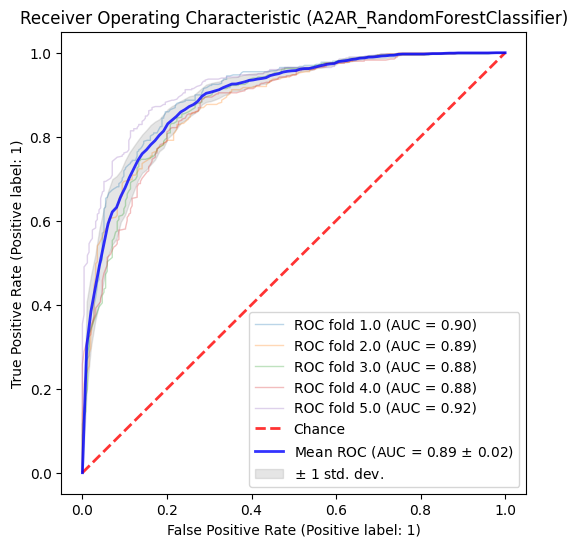

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [5]:
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make(property_name="pchembl_value_Median_class", validation='cv', save = True, show=True)

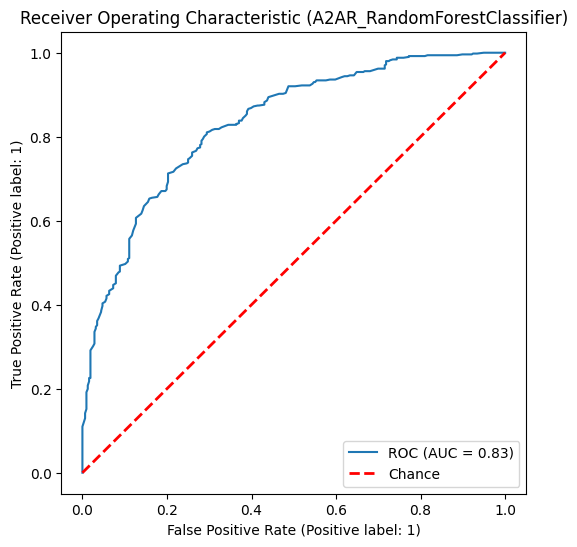

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [6]:
plot = ROCPlot([model])
plot.make(property_name="pchembl_value_Median_class", validation='ind', save = True, show=True)

In [7]:
sample_inputs = [
    'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', # caffeine
    'c1ccccc1CCN1N=CC2=C1N=C(N)N3C2=NC(C4=CC=CO4)=N3' # SCH-58261 (50x more selective to A2A than caffeine -> more potent)
]

In [8]:
model.predictMols(sample_inputs, use_probas=True)

Missing values filled with nan


[array([[0.764, 0.236],
        [0.012, 0.988]])]

In [9]:
from qsprpred.models.models import QSPRsklearn

predictor = QSPRsklearn(
    name='A2AR_RandomForestClassifier',
    base_dir='./data/models/qsar'
)

predictor.predictMols(sample_inputs, use_probas=True)

Missing values filled with nan


[array([[0.764, 0.236],
        [0.012, 0.988]])]

In [10]:
from drugex.training.scorers.qsprpred import QSPRPredScorer

qsprpred_scorer = QSPRPredScorer(
    predictor
)

qsprpred_scorer.getScores(sample_inputs)

Missing values filled with nan


array([0.236, 0.988])